In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve



def gauss_jacobi_sparse(A, b, x0, tol, maxit):
    n = A.shape[0]
    x = x0.copy()
    hist_res = []
    hist_rel = []
    D = A.diagonal()
    
    if np.any(np.abs(D) < 1e-15): D = D + 1e-20 
        
    R = A.copy()
    R.setdiag(0)
    
    for k in range(maxit):
        res = b - A.dot(x)
        norm_res = np.linalg.norm(res, np.inf)
        
        if k > 0:
            norm_rel = np.linalg.norm(x - x_old, np.inf) / (np.linalg.norm(x, np.inf) + 1e-15)
        else:
            norm_rel = 1.0
            
        hist_res.append(norm_res)
        hist_rel.append(norm_rel)
        
        if norm_res < tol and norm_rel < tol:
            break
            
        x_old = x.copy()
        Rx = R.dot(x)
        x = (b - Rx) / D
        
    return x, hist_res, hist_rel

def gauss_seidel_sparse(A, b, x0, tol, maxit):
    x = x0.copy()
    hist_res = []
    hist_rel = []
    Lower = sparse.tril(A, format='csr') 
    Upper = sparse.triu(A, k=1, format='csr')
    
    for k in range(maxit):
        res = b - A.dot(x)
        norm_res = np.linalg.norm(res, np.inf)
        if k > 0:
            norm_rel = np.linalg.norm(x - x_old, np.inf) / (np.linalg.norm(x, np.inf) + 1e-15)
        else:
            norm_rel = 1.0
        hist_res.append(norm_res)
        hist_rel.append(norm_rel)
        if norm_res < tol and norm_rel < tol: break
        x_old = x.copy()
        rhs = b - Upper.dot(x)
        x = spsolve(Lower, rhs)
        
    return x, hist_res, hist_rel


def print_table(method, res, rel):
    print(f"\n--- {method} ---")
    print(f"{'k':<5} | {'Resíduo':<15} | {'Erro Rel.':<15}")
    print("-" * 42)
    indices = range(len(res))
    if len(indices) > 15:
        indices = list(range(10)) + list(range(len(indices)-5, len(indices)))
    for k in indices:
        if k == 10 and len(res) > 15: print("...")
        print(f"{k+1:<5} | {res[k]:<15.2e} | {rel[k]:<15.2e}")
    print(f"Total: {len(res)} iterações")

def plot_graphs(res_j, rel_j, res_s, rel_s, title):
    """Gera e MOSTRA o gráfico imediatamente"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    
    if res_j: ax1.semilogy(res_j, 'o-', label='Jacobi', markersize=3, alpha=0.7)
    if res_s: ax1.semilogy(res_s, 'x-', label='Seidel', markersize=3, alpha=0.7)
    ax1.set_title(f'Resíduo - {title}')
    ax1.set_xlabel('Iterações'); ax1.set_ylabel('log(Norma Resíduo)'); ax1.legend(); ax1.grid(True, which="both", ls="--", alpha=0.4)
    
    if rel_j: ax2.semilogy(rel_j, 'o-', label='Jacobi', markersize=3, alpha=0.7)
    if rel_s: ax2.semilogy(rel_s, 'x-', label='Seidel', markersize=3, alpha=0.7)
    ax2.set_title(f'Erro Relativo - {title}')
    ax2.set_xlabel('Iterações'); ax2.set_ylabel('log(Erro Relativo)'); ax2.legend(); ax2.grid(True, which="both", ls="--", alpha=0.4)
    
    plt.tight_layout()
    plt.show() 


 EXERCÍCIO II: TRELIÇA 
Calculando...

--- Jacobi (Treliça) ---
k     | Resíduo         | Erro Rel.      
------------------------------------------
1     | 1.00e+04        | 1.00e+00       
2     | 1.00e+04        | 1.00e+00       
3     | 1.00e+04        | 1.00e+00       
4     | 1.00e+04        | 8.16e-01       
5     | 1.00e+04        | 8.66e-01       
6     | 1.00e+04        | 1.00e+00       
7     | 5.77e+03        | 9.35e-01       
8     | 5.77e+03        | 5.40e-01       
9     | 3.33e+03        | 5.77e-01       
10    | 3.33e+03        | 3.33e-01       
103   | 2.04e-08        | 3.54e-12       
104   | 2.04e-08        | 2.04e-12       
105   | 1.18e-08        | 2.04e-12       
106   | 1.18e-08        | 1.18e-12       
107   | 6.81e-09        | 1.18e-12       
Total: 107 iterações

--- Seidel (Treliça) ---
k     | Resíduo         | Erro Rel.      
------------------------------------------
1     | 1.00e+04        | 1.00e+00       
2     | 1.00e+04        | 1.00e+00       
3   

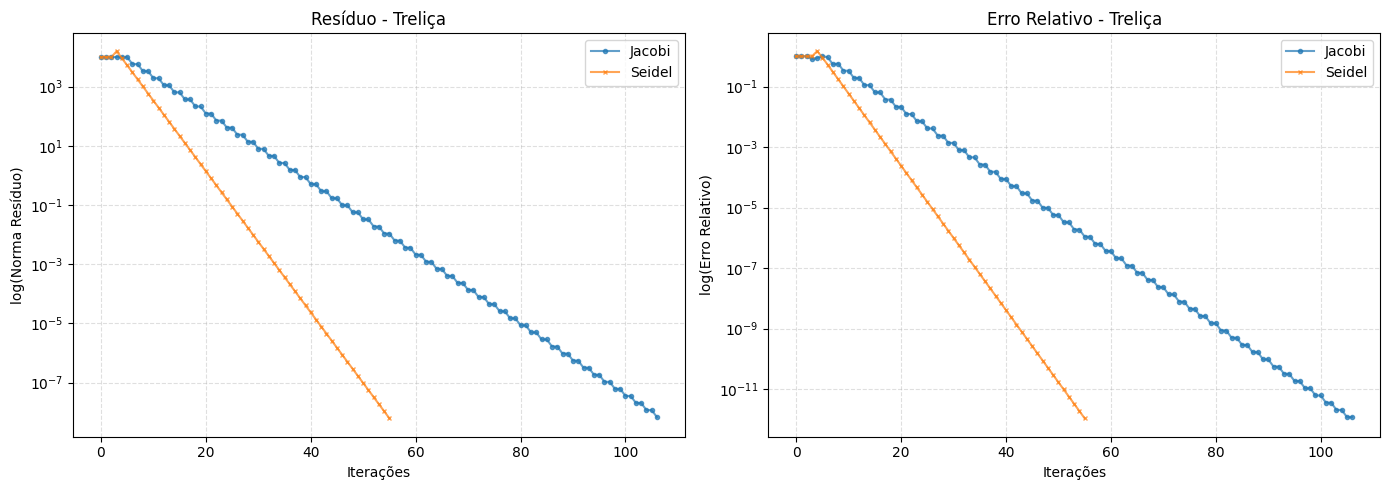

In [2]:


def run_ex2():
    print("\n" + "="*40 + "\n EXERCÍCIO II: TRELIÇA \n" + "="*40)
    
    s45 = np.sin(np.pi/4); c45 = np.cos(np.pi/4)
    s30 = np.sin(np.pi/6); c30 = np.cos(np.pi/6)
    
    A = sparse.lil_matrix((8, 8)); b = np.zeros(8)
    
    
    A[0,0]=-1.0; A[0,4]=1.0; A[0,3]=c45
    
    A[1,1]=1.0; A[1,3]=s45
    
    A[2,2]=1.0; A[2,6]=s30
    
    A[3,3]=-s45; A[3,5]=-1.0; A[3,6]=-s30
    
    A[4,4]=-1.0; A[4,7]=1.0
    
    A[5,5]=1.0; b[5]=10000
    
    A[6,6]=c30; A[6,3]=-c45
    
    A[7,7]=-1.0; A[7,6]=-c30
    
    x0 = np.zeros(8); tol = 1e-8; maxit = 2000
    A_csr = A.tocsr()
    
    print("Calculando...")
    xj, resj, relj = gauss_jacobi_sparse(A_csr, b, x0, tol, maxit)
    xs, ress, rels = gauss_seidel_sparse(A_csr, b, x0, tol, maxit)
    
    print_table("Jacobi (Treliça)", resj, relj)
    print_table("Seidel (Treliça)", ress, rels)
    
    vars = ["F1", "F2", "F3", "f1", "f2", "f3", "f4", "f5"]
    print("\n>>> Resultados Finais (N):")
    for i, val in enumerate(xs): print(f"{vars[i]:<5}: {val:>10.2f}")
        
    plot_graphs(resj, relj, ress, rels, "Treliça")

run_ex2()